# Pipeline Speed Test

In [1]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from lib.segmentation import segmentation_adjacency, FormFeatureExtraction
from lib.graph import coarsen_adj, perm_features

def pipeline(image, segmentation_algorithm):
    t_segmentation = time.process_time()
    segmentation = segmentation_algorithm(image)
    t_segmentation = time.process_time() - t_segmentation
    
    t_adjacency = time.process_time()
    adj, points, mass = segmentation_adjacency(segmentation)
    t_adjacency = time.process_time() - t_adjacency
    
    t_coarsen = time.process_time() 
    adjs_dist, adjs_rad, perm = coarsen_adj(adj, points, mass, levels=4)
    t_coarsen = time.process_time() - t_coarsen
    
    t_features = time.process_time()
    features = FormFeatureExtraction(segmentation).get_features()
    features = perm_features(features, perm)
    t_features = time.process_time() - t_features
    
    t_all = t_segmentation + t_adjacency + t_coarsen + t_features
    
    p_segmentation = 100 * t_segmentation / t_all
    p_adjacency = 100 * t_adjacency / t_all
    p_coarsen = 100 * t_coarsen / t_all
    p_features = 100 * t_features / t_all
    
    print('Number of nodes: {}'.format(features.shape[0]))
    print('Execution time: {:.5f}s'.format(t_all))
    print('0. Segmentation: {:.5f}s, {:.2f}%'.format(t_segmentation, p_segmentation))
    print('1. Adjacency generation: {:.5f}s, {:.2f}%'.format(t_adjacency, p_adjacency))
    print('2. Coarsening: {:.5f}s, {:.2f}%'.format(t_coarsen, p_coarsen))
    print('3. Feature extraction: {:.5f}s, {:.2f}%'.format(t_features, p_features))
    
    plt.bar(range(4), [p_segmentation, p_adjacency, p_coarsen, p_features], color="black")
    plt.ylabel('Percentage')

## Load dataset images

In [3]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Number of nodes: 80
Execution time: 0.01620s
0. Segmentation: 0.00468s, 28.89%
1. Adjacency generation: 0.00056s, 3.44%
2. Coarsening: 0.00884s, 54.58%
3. Feature extraction: 0.00212s, 13.09%


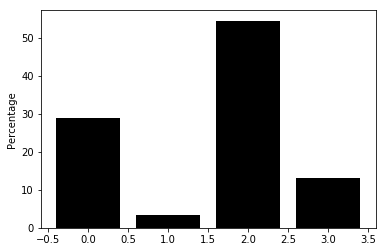

In [5]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
pipeline(mnist, slic)

## MNIST Quickshift

Number of nodes: 96
Execution time: 0.02149s
0. Segmentation: 0.00514s, 23.89%
1. Adjacency generation: 0.00057s, 2.67%
2. Coarsening: 0.01234s, 57.40%
3. Feature extraction: 0.00345s, 16.04%


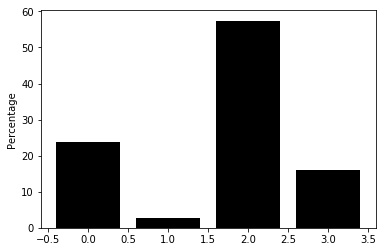

In [6]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
pipeline(mnist, quickshift)

## Cifar10 SLIC

Number of nodes: 288
Execution time: 0.02441s
0. Segmentation: 0.00409s, 16.76%
1. Adjacency generation: 0.00097s, 3.99%
2. Coarsening: 0.01587s, 65.01%
3. Feature extraction: 0.00348s, 14.24%


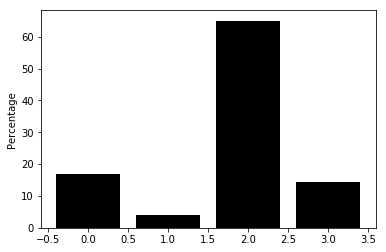

In [7]:
slic = slic_fixed(num_segments=200, compactness=5, max_iterations=10, sigma=0)
pipeline(cifar_10, slic)

## Cifar10 Quickshift

Number of nodes: 208
Execution time: 0.02163s
0. Segmentation: 0.00380s, 17.56%
1. Adjacency generation: 0.00078s, 3.58%
2. Coarsening: 0.01378s, 63.74%
3. Feature extraction: 0.00327s, 15.11%


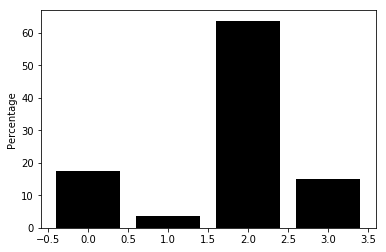

In [8]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
pipeline(cifar_10, quickshift)

## PascalVOC SLIC

Number of nodes: 1808
Execution time: 0.37260s
0. Segmentation: 0.24131s, 64.76%
1. Adjacency generation: 0.02869s, 7.70%
2. Coarsening: 0.05682s, 15.25%
3. Feature extraction: 0.04578s, 12.29%


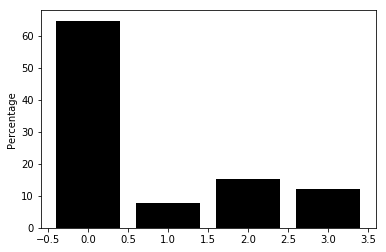

In [9]:
slic = slic_fixed(num_segments=1600, compactness=30, max_iterations=10, sigma=0)
pipeline(pascal_voc, slic)

## PascalVOC Quickshift

Number of nodes: 2000
Execution time: 0.77889s
0. Segmentation: 0.60086s, 77.14%
1. Adjacency generation: 0.04332s, 5.56%
2. Coarsening: 0.08895s, 11.42%
3. Feature extraction: 0.04576s, 5.88%


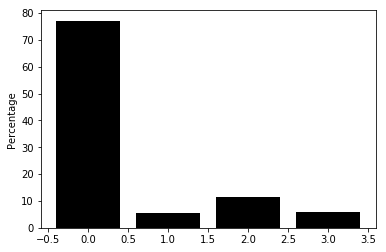

In [10]:
quickshift = quickshift_fixed(ratio=0.75, kernel_size=2, max_dist=8, sigma=0)
pipeline(pascal_voc, quickshift)